In [ ]:
from pathlib import Path

import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data_base_dir = Path('/Users/janneke/Documents/Documents – Janneke’s MacBook/data/ocrpostcorrection')

In [ ]:
in_file = data_base_dir/'results'/'simple_correction_model_2023-01-14'/'predictions.csv'
data = pd.read_csv(in_file, index_col=0)

In [ ]:
print(pd.DataFrame([data.ed.describe(), data.ed_pred.describe()])[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(2).to_markdown())

|         |   mean |   std |   min |   25% |   50% |   75% |   max |
|:--------|-------:|------:|------:|------:|------:|------:|------:|
| ed      |   2.99 |  2.26 |     1 |     1 |     2 |     4 |    22 |
| ed_pred |   2.11 |  2.53 |     0 |     0 |     1 |     3 |    23 |


In [ ]:
def classify_ed_difference(row):
    result = None
    if row.ed_pred == 0:
        result = 'correct prediction'
    elif row.ed_pred < row.ed:
        result = 'edit distance improved'
    elif row.ed_pred == row.ed:
        if row.ocr == row.pred:
            result = 'no change (prediction equal to ocr)'
        else:
            result = 'no change (prediction not equal to ocr)'
    else:
        assert row.ed_pred > row.ed
        result = 'edit distance increased'
    return result

data['ed_diff_class'] = data.apply(lambda row: classify_ed_difference(row), axis=1)

In [ ]:
data['ed_diff_class'].value_counts()

correct prediction                         76708
edit distance improved                     71862
edit distance increased                    40537
no change (prediction not equal to ocr)    38762
no change (prediction equal to ocr)        31597
Name: ed_diff_class, dtype: int64

In [ ]:
print(pd.DataFrame([data['ed_diff_class'].value_counts(), (data['ed_diff_class'].value_counts()/data.shape[0] * 100)]).round(2).T.to_markdown())

|                                         |   ed_diff_class |   ed_diff_class |
|:----------------------------------------|----------------:|----------------:|
| correct prediction                      |           76708 |           29.56 |
| edit distance improved                  |           71862 |           27.7  |
| edit distance increased                 |           40537 |           15.62 |
| no change (prediction not equal to ocr) |           38762 |           14.94 |
| no change (prediction equal to ocr)     |           31597 |           12.18 |


<AxesSubplot: >

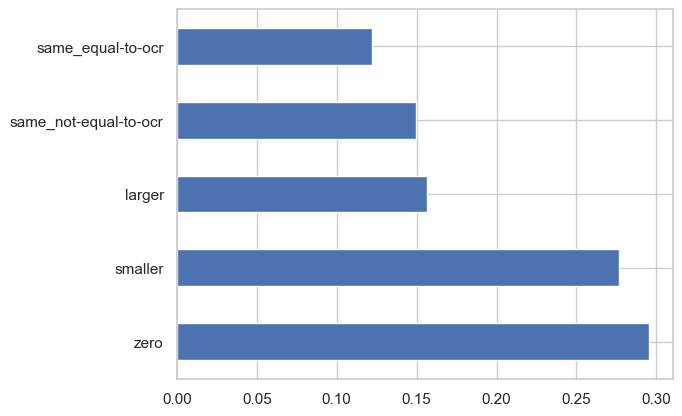

In [ ]:
(data['ed_diff_class'].value_counts()/data.shape[0]).plot(kind='barh')

In [ ]:
data.query('ed_diff_class == "same_not-equal-to-ocr"').sample(5)[['ocr', 'gs', 'pred', 'ed', 'ed_pred']]

,ocr,gs,pred,ed,ed_pred
55613,das nent,dasnent,dasnen,1,1
141732,Stogebue's,Kotzebue's,Rogebuee's,4,4
248089,3U02,3002,3102,1,1
99766,babet,dabei,habet,2,2
197971,Dire,Dir,Die,1,1


In [ ]:
data.query('ed_diff_class == "zero"').sample(5)[['ocr', 'gs', 'pred', 'ed', 'ed_pred']]

,ocr,gs,pred,ed,ed_pred
84596,*Et,Et,Et,1,0
197299,"wirb den,","wirdden,","wirdden,",2,0
123201,{n er,iner,iner,2,0
134983,benn!,denn!,denn!,1,0
52790,PBerfe,Werke,Werke,3,0


In [ ]:
data.query('ed_diff_class == "larger"').sample(5)[['ocr', 'gs', 'pred', 'ed', 'ed_pred']]

,ocr,gs,pred,ed,ed_pred
79409,"gewalt, Dasfcaffeman",gewalt.Das ſchafft man,"gewalt,Aasſſeaaaan",7,10
218083,Bräut'gam; Dein,Bräut'gam;Dem,Bräutig';Damen,3,6
230835,Jsiintäysdistyksen,Isäntäysdistyksen,sintätäysiystksen,3,7
231693,d’escossé,"d’Escosse,",d'escossé,3,4
231182,"Pounsset,","Poinsset,","Poussset,",1,2


Hypothesis: zero and smaller have mean shorter word length compared to same and larger
(model is better at correcting shorter words)

In [ ]:
data.groupby('ed_diff_class')['len_ocr'].describe()

,count,mean,std,min,25%,50%,75%,max
ed_diff_class,,,,,,,,
larger,41438.0,10.098050,4.868715,1.0,6.0,9.0,13.0,22.0
same_equal-to-ocr,33366.0,5.769286,2.647399,1.0,4.0,6.0,7.0,18.0
same_not-equal-to-ocr,38913.0,7.725567,3.972867,1.0,5.0,7.0,10.0,22.0
smaller,71680.0,9.648814,4.000852,1.0,7.0,9.0,12.0,22.0
zero,74069.0,7.800051,2.915089,1.0,6.0,7.0,10.0,22.0


<AxesSubplot: >

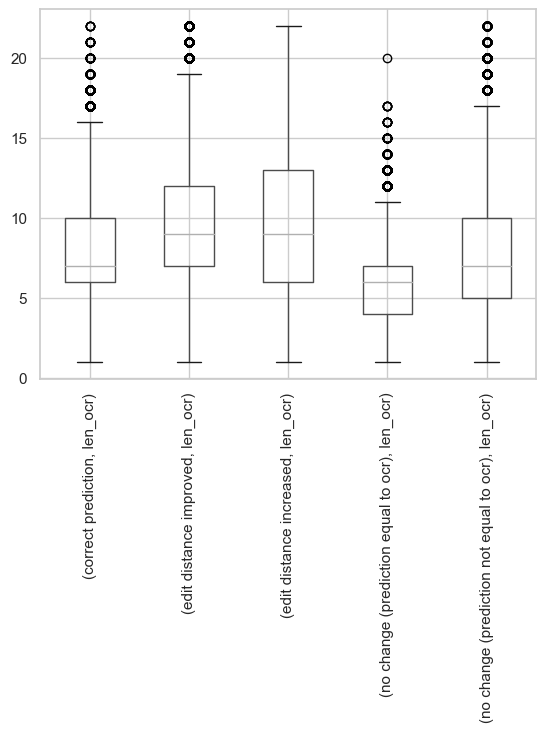

In [ ]:
data.groupby('ed_diff_class').boxplot(column='len_ocr', subplots=False, rot=90)

In [ ]:
data

,ocr,gs,ocr_aligned,gs_aligned,start,len_ocr,language,subset,dataset,len_gs,diff,pred,ed,ed_norm,ed_pred,ed_norm_pred
1469363,Zha I,Zha,Zha I,Zha@@,528,5,SL,SL1,test,3,2,Tha,2,0.400000,1,0.333333
1469364,tefts,227 tests,@@@@@tefts,227 tests,0,5,SL,SL1,test,9,-4,teſts,5,0.555556,5,0.555556
1469365,je -,je,je -,je@@,18,4,SL,SL1,test,2,2,je‑,2,0.500000,1,0.333333
1469366,she.viija,shevina,she.viija,she@v@ina,23,9,SL,SL1,test,7,2,she.vijaa,3,0.333333,3,0.333333
1469367,plknian^,pikniana,plknian^,pikniana,33,8,SL,SL1,test,8,0,plinian,2,0.250000,3,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853818,"he,—I","he, I","he,—I","he, I",1416,5,EN,EN1,test,5,0,"he,",1,0.200000,1,0.200000
1853819,turpentine.—,turpentine.,turpentine.—,turpentine.,1432,12,EN,EN1,test,11,1,turpentine.,1,0.083333,0,0.000000
1853820,There’s,There's,There’s,There's,1445,7,EN,EN1,test,7,0,There's,1,0.142857,0,0.000000
1853822,keeper.,keeper. 'Tis,keeper.@@@@@,keeper. 'Tis,1513,7,EN,EN1,test,12,-5,keeper.,5,0.416667,5,0.416667
